# Problem Statement :
Using Moneyball data, predcting whether a team will make the playoff or not?

### Here, I am using Logistic Regression to solve the problem because :
It is used to predict the probability of a categorical dependent variable. The dependent variable is the binary variable that has data coded as "1" (if the team will get Playoff) or "0"(if no playoff) which is the situation here.

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
df = pd.read_csv("/home/vanshika/Downloads/baseball.csv")
df = df.fillna(df.RankSeason.mean())

In [3]:
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,3.122951,3.122951,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.000000,5.000000,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.000000,4.000000,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,3.122951,3.122951,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,3.122951,3.122951,162,0.335,0.424


In [4]:
df['Playoffs'].value_counts()

0    988
1    244
Name: Playoffs, dtype: int64

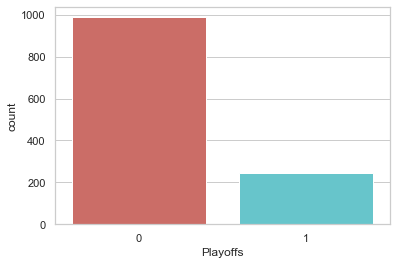

<Figure size 432x288 with 0 Axes>

In [5]:
sns.countplot(x='Playoffs',data=df,palette='hls')
plt.show()
plt.savefig('count_plot')

In [6]:
count_no_play = len(df[df['Playoffs']==0])
count_play = len(df[df['Playoffs']==1])
pct_of_no_play = count_no_play/(count_no_play+count_play)
print("percentage of no playoff is", pct_of_no_play*100)
pct_of_play = count_play/(count_no_play+count_play)
print("percentage of playoff", pct_of_play*100)

percentage of no playoff is 80.1948051948052
percentage of playoff 19.805194805194805


In [7]:
df.groupby('Playoffs').mean()

,Year,RS,RA,W,OBP,SLG,BA,RankSeason,RankPlayoffs,G,OOBP,OSLG
Playoffs,,,,,,,,,,,,
0,1987.884615,697.502024,727.172065,77.393725,0.323617,0.391976,0.257412,3.122951,3.122951,161.911943,2.259881,2.287558
1,1993.303279,786.266393,666.127049,95.118852,0.337320,0.419070,0.266807,3.122951,2.717213,161.946721,1.814035,1.852543


In [8]:
df.groupby('Team').mean()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
Team,,,,,,,,,,,,,
ANA,2000.500000,788.125000,765.375000,83.000000,0.336750,0.422250,0.271625,0.250000,3.467213,2.967213,162.000000,1.030113,1.095738
ARI,2005.000000,742.200000,748.466667,80.666667,0.328733,0.419600,0.258267,0.333333,3.348634,3.148634,162.000000,0.512797,0.598130
ATL,1989.325581,710.441860,684.279070,83.395349,0.325767,0.396860,0.257930,0.395349,3.027831,3.167366,161.837209,2.211013,2.234432
BAL,1987.127660,726.702128,710.212766,83.361702,0.328723,0.403149,0.258830,0.234043,2.902686,2.923962,161.680851,2.295306,2.322753
BOS,1987.127660,781.489362,729.148936,85.893617,0.339553,0.423681,0.269511,0.276596,3.195326,3.003837,161.787234,2.289497,2.314434
CAL,1979.785714,660.428571,688.928571,78.178571,0.318786,0.370321,0.251750,0.107143,3.145492,3.109778,161.892857,3.122951,3.122951
CHC,1987.127660,695.191489,727.021277,77.425532,0.321426,0.395021,0.257277,0.127660,3.234915,3.171085,161.957447,2.291093,2.315029
CHW,1987.127660,718.276596,711.659574,81.659574,0.325404,0.397426,0.259234,0.106383,3.109871,3.109871,161.936170,2.290646,2.317838
CIN,1987.127660,722.297872,706.085106,84.021277,0.326660,0.401787,0.258766,0.170213,2.995640,2.995640,162.063830,2.292795,2.323327


<Figure size 1440x2160 with 0 Axes>

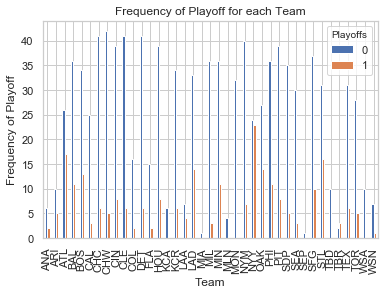

In [9]:
%matplotlib inline
plt.figure(figsize=(20,30))
pd.crosstab(df.Team,df.Playoffs).plot(kind='bar')
plt.title('Frequency of Playoff for each Team')
plt.xlabel('Team')
plt.ylabel('Frequency of Playoff')
plt.savefig('Frequency_of_Playoff')

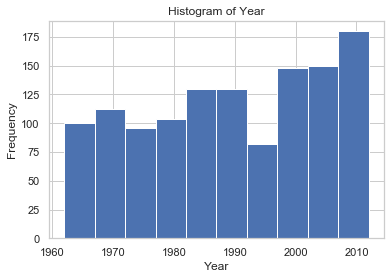

In [10]:
df.Year.hist()
plt.title('Histogram of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.savefig('hist_year')

## Creating dummy variable
The variables will have only two values.

In [11]:
cat_vars=['Team','League']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1
cat_vars=['Team','League']
df_vars=df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]

### Our Final Data Fields

In [12]:
df_final=df[to_keep]
df_final.columns.values

array(['Year', 'RS', 'RA', 'W', 'OBP', 'SLG', 'BA', 'Playoffs',
       'RankSeason', 'RankPlayoffs', 'G', 'OOBP', 'OSLG', 'Team_ANA',
       'Team_ARI', 'Team_ATL', 'Team_BAL', 'Team_BOS', 'Team_CAL',
       'Team_CHC', 'Team_CHW', 'Team_CIN', 'Team_CLE', 'Team_COL',
       'Team_DET', 'Team_FLA', 'Team_HOU', 'Team_KCA', 'Team_KCR',
       'Team_LAA', 'Team_LAD', 'Team_MIA', 'Team_MIL', 'Team_MIN',
       'Team_MLN', 'Team_MON', 'Team_NYM', 'Team_NYY', 'Team_OAK',
       'Team_PHI', 'Team_PIT', 'Team_SDP', 'Team_SEA', 'Team_SEP',
       'Team_SFG', 'Team_STL', 'Team_TBD', 'Team_TBR', 'Team_TEX',
       'Team_TOR', 'Team_WSA', 'Team_WSN', 'League_AL', 'League_NL'],
      dtype=object)

In [13]:
X = df_final.loc[:, df_final.columns != 'Playoffs']
y = df_final.loc[:, df_final.columns == 'Playoffs']

## Implementing the model

In [18]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.117529
         Iterations: 35
                                 Results: Logit
Model:                    Logit                Pseudo R-squared:     0.764      
Dependent Variable:       Playoffs             AIC:                  393.5913   
Date:                     2020-01-04 16:10     BIC:                  659.6438   
No. Observations:         1232                 Log-Likelihood:       -144.80    
Df Model:                 51                   LL-Null:              -613.15    
Df Residuals:             1180                 LLR p-value:          3.6098e-163
Converged:                0.0000               Scale:                1.0000     
No. Iterations:           35.0000                                               
--------------------------------------------------------------------------------
               Coef.      Std.Err.      z    P>|z|      [0.025         0.975]   
----------------------------------------------------------------------------

/home/vanshika/MLAI/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### Logistic Regression Model Fitting 

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/vanshika/MLAI/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vanshika/MLAI/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


### Accracy of the test classifier on the model is : 0.93 

In [21]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[274  11]
 [ 15  70]]


In [22]:
#Computing precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       285
           1       0.86      0.82      0.84        85

    accuracy                           0.93       370
   macro avg       0.91      0.89      0.90       370
weighted avg       0.93      0.93      0.93       370



# ROC Curve

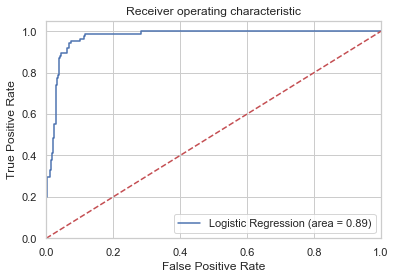

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# -----------------------------------------------------------------------------------------------------